In [4]:
import camb
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

# Effect of Dark Energy on the CMB Spectrum

This code implements the research described in the paper: comparing the effects of different dark energy equation of state $w$ on the CMB temperature anisotropy power spectrum.

We will calculate three scenarios:
1. Standard cosmological constant: $w = -1$ (ΛCDM)
2. Quintessence-like dark energy: $w = -0.5$
3. Phantom dark energy: $w = -1.5$


## Set Cosmological Parameters

Using parameters specified in the paper:
- $\Omega_m h^2 = 0.143$
- $\Omega_b h^2 = 0.0221$
- $\ln(10^{10}A_s) = 3.04$
- $n_s = 0.963$
- $\tau = 0.052$
- $h = 0.669$


In [5]:
# Planck best-fit parameters
h = 0.669
ombh2 = 0.0221  # Omega_baryon * h^2
ommh2 = 0.143   # Omega_matter * h^2
omch2 = ommh2 - ombh2  # Omega_cdm * h^2
tau = 0.052  # Reionization optical depth
As = np.exp(3.04) * 1e-10  # Primordial power spectrum amplitude
ns = 0.963  # Scalar spectral index

print("Cosmological parameters:")
print(f"$h$ = {h}")
print(f"$\Omega_b h^2$ = {ombh2}")
print(f"$\Omega_c h^2$ = {omch2:.4f}")
print(f"$\Omega_m h^2$ = {ommh2}")
print(f"$\tau$ = {tau}")
print(f"$A_s$ = {As:.4e}")
print(f"$n_s$ = {ns}")

Cosmological parameters:
$h$ = 0.669
$\Omega_b h^2$ = 0.0221
$\Omega_c h^2$ = 0.1209
$\Omega_m h^2$ = 0.143
$	au$ = 0.052
$A_s$ = 2.0905e-09
$n_s$ = 0.963


<>:12: SyntaxWarning: invalid escape sequence '\O'
<>:13: SyntaxWarning: invalid escape sequence '\O'
<>:14: SyntaxWarning: invalid escape sequence '\O'
<>:12: SyntaxWarning: invalid escape sequence '\O'
<>:13: SyntaxWarning: invalid escape sequence '\O'
<>:14: SyntaxWarning: invalid escape sequence '\O'
/var/folders/v_/yjk9y6rx60n478txj7qn8qtr0000gn/T/ipykernel_24514/3145749238.py:12: SyntaxWarning: invalid escape sequence '\O'
  print(f"$\Omega_b h^2$ = {ombh2}")
/var/folders/v_/yjk9y6rx60n478txj7qn8qtr0000gn/T/ipykernel_24514/3145749238.py:13: SyntaxWarning: invalid escape sequence '\O'
  print(f"$\Omega_c h^2$ = {omch2:.4f}")
/var/folders/v_/yjk9y6rx60n478txj7qn8qtr0000gn/T/ipykernel_24514/3145749238.py:14: SyntaxWarning: invalid escape sequence '\O'
  print(f"$\Omega_m h^2$ = {ommh2}")


## Funcs


In [ ]:
def compute_cmb_spectrum(w, h=0.669, ombh2=0.0221, omch2=0.1209, 
                         As=2.09e-9, ns=0.963, tau=0.052):
    """
    Compute CMB power spectrum for a given dark energy equation of state parameter w
    
    Parameters:
        w: Dark energy equation of state parameter (w = P/rho)
        h: Hubble constant H0 = 100h km/s/Mpc
        ombh2: Baryon density parameter
        omch2: Cold dark matter density parameter
        As: Primordial power spectrum amplitude
        ns: Scalar spectral index
        tau: Reionization optical depth
    
    Returns:
        ells: Multipole moments l
        cls: CMB temperature power spectrum D_l = l(l+1)C_l/(2\pi) [\mu K^2]
    """
    pars = camb.CAMBparams()
    
    pars.set_cosmology(H0=h*100, ombh2=ombh2, omch2=omch2, tau=tau)
    
    pars.set_dark_energy(w=w, dark_energy_model='fluid')
    
    pars.InitPower.set_params(As=As, ns=ns)
    
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    
    totCL = powers['total']
    ells = np.arange(totCL.shape[0])
    
    cls_TT = totCL[:, 0]  # TT power spectrum
    
    return ells, cls_TT


Function definition complete


## 3. Compute CMB Power Spectra for Three Dark Energy Models

Following the paper's methodology section, calculate three scenarios:
1. $w = -1.0$ (Standard ΛCDM)
2. $w = -0.5$ (Quintessence-like dark energy)
3. $w = -1.5$ (Phantom dark energy)


In [7]:
# Define three w values
w_values = [-1.0, -0.5, -1.5]
labels = ['ΛCDM (w=-1.0)', 'Quintessence (w=-0.5)', 'Phantom (w=-1.5)']
colors = ['blue', 'red', 'green']

# Store results
results = {}

# Compute power spectrum for each model
for w, label in zip(w_values, labels):
    print(f"Computing {label}...")
    ells, cls = compute_cmb_spectrum(w, h=h, ombh2=ombh2, omch2=omch2, 
                                      As=As, ns=ns, tau=tau)
    results[w] = {'ells': ells, 'cls': cls, 'label': label}
    print(f"  Done! Power spectrum range: ℓ = {ells[2]} to {ells[-1]}")

print("\nAll computations complete!")


Computing ΛCDM (w=-1.0)...
  Done! Power spectrum range: ℓ = 2 to 2550
Computing Quintessence (w=-0.5)...
  Done! Power spectrum range: ℓ = 2 to 2550
Computing Phantom (w=-1.5)...
  Done! Power spectrum range: ℓ = 2 to 2550

All computations complete!


## Plot CMB 


<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
/var/folders/v_/yjk9y6rx60n478txj7qn8qtr0000gn/T/ipykernel_24514/4161858793.py:9: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$', fontsize=14)
/var/folders/v_/yjk9y6rx60n478txj7qn8qtr0000gn/T/ipykernel_24514/4161858793.py:10: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$D_\ell = \ell(\ell+1)C_\ell/(2\pi)$ [$\mu$K$^2$]', fontsize=14)


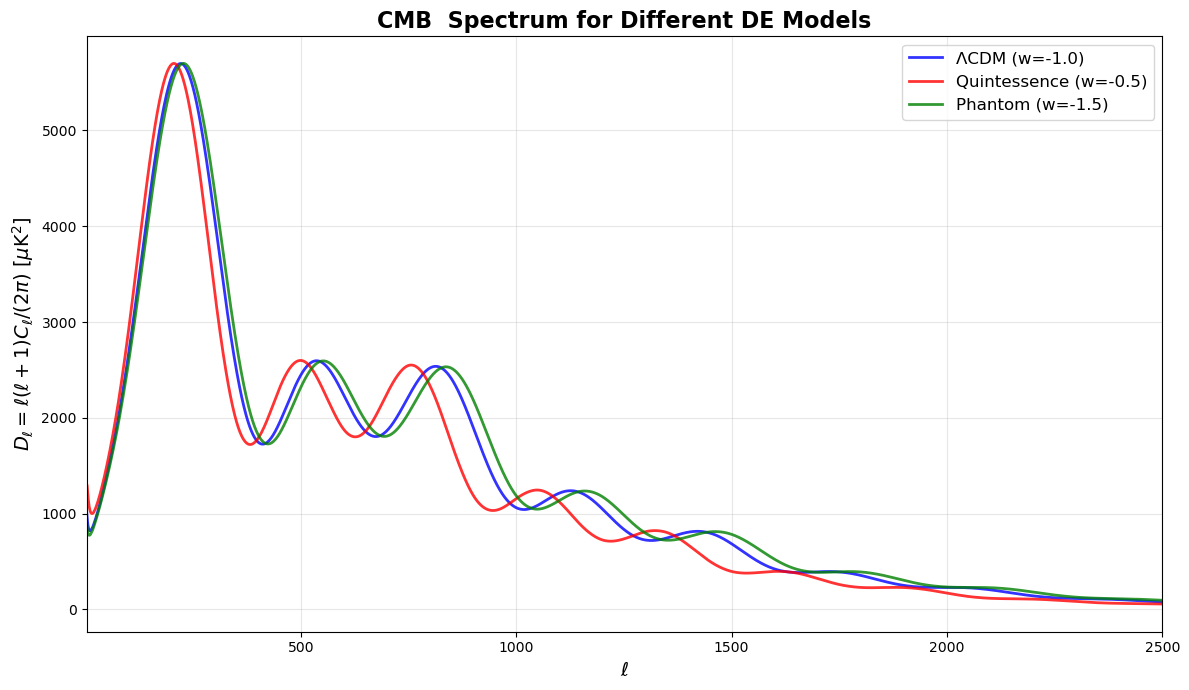

Figures saved as cmb_power_spectrum_comparison.pdf and .png


In [8]:
plt.figure(figsize=(12, 7))

# Plot power spectra for three models
for w, color, label in zip(w_values, colors, labels):
    ells = results[w]['ells']
    cls = results[w]['cls']
    plt.plot(ells[2:], cls[2:], color=color, linewidth=2, label=label, alpha=0.8)

plt.xlabel('$\ell$', fontsize=14)
plt.ylabel('$D_\ell = \ell(\ell+1)C_\ell/(2\pi)$ [$\mu$K$^2$]', fontsize=14)
plt.title('CMB  Spectrum for Different DE Models', 
          fontsize=16, fontweight='bold')
plt.xlim(2, 2500)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.savefig('cmb_power_spectrum_comparison.pdf', dpi=300, bbox_inches='tight')
plt.savefig('cmb_power_spectrum_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figures saved as cmb_power_spectrum_comparison.pdf and .png")


## Ratio


<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:29: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:29: SyntaxWarning: invalid escape sequence '\e'
/var/folders/v_/yjk9y6rx60n478txj7qn8qtr0000gn/T/ipykernel_24514/2063557082.py:10: SyntaxWarning: invalid escape sequence '\e'
  ax1.set_ylabel('$D_\ell$ [$\mu$K$^2$]', fontsize=14)
/var/folders/v_/yjk9y6rx60n478txj7qn8qtr0000gn/T/ipykernel_24514/2063557082.py:29: SyntaxWarning: invalid escape sequence '\e'
  ax2.set_xlabel('$\ell$', fontsize=14)
/var/folders/v_/yjk9y6rx60n478txj7qn8qtr0000gn/T/ipykernel_24514/2063557082.py:25: RuntimeWarning: invalid value encountered in divide
  rel_diff = (cls_w - cls_lcdm) / cls_lcdm


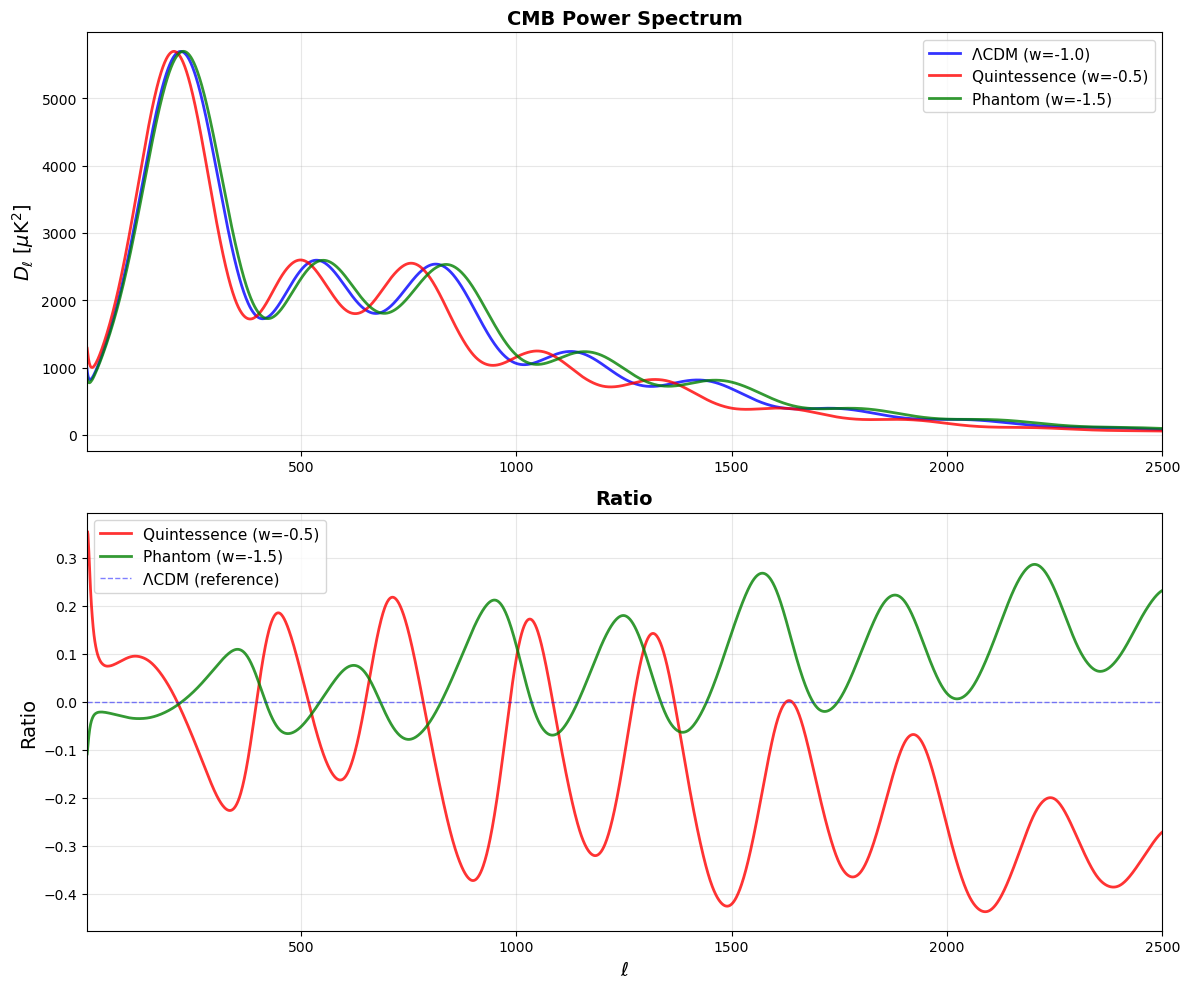

Relative difference plot saved


In [9]:
# Calculate relative differences (relative to ΛCDM)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Upper panel: Power spectrum
for w, color, label in zip(w_values, colors, labels):
    ells = results[w]['ells']
    cls = results[w]['cls']
    ax1.plot(ells[2:], cls[2:], color=color, linewidth=2, label=label, alpha=0.8)

ax1.set_ylabel('$D_\ell$ [$\mu$K$^2$]', fontsize=14)
ax1.set_title('CMB Power Spectrum', fontsize=14, fontweight='bold')
ax1.set_xlim(2, 2500)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)

# Lower panel: Relative differences
ells_lcdm = results[-1.0]['ells']
cls_lcdm = results[-1.0]['cls']

for w, color, label in zip([-0.5, -1.5], [colors[1], colors[2]], [labels[1], labels[2]]):
    ells_w = results[w]['ells']
    cls_w = results[w]['cls']
    
    # Calculate relative difference (percentage)
    rel_diff = (cls_w - cls_lcdm) / cls_lcdm
    ax2.plot(ells_w[2:], rel_diff[2:], color=color, linewidth=2, label=label, alpha=0.8)

ax2.axhline(0, color='blue', linestyle='--', linewidth=1, alpha=0.5, label='ΛCDM (reference)')
ax2.set_xlabel('$\ell$', fontsize=14)
ax2.set_ylabel('Ratio', fontsize=14)
ax2.set_title('Ratio', fontsize=14, fontweight='bold')
ax2.set_xlim(2, 2500)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

plt.tight_layout()
plt.savefig('cmb_relative_difference.pdf', dpi=300, bbox_inches='tight')
plt.savefig('cmb_relative_difference.png', dpi=300, bbox_inches='tight')
plt.show()

print("Relative difference plot saved")


## ISW in Low $l$


<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
/var/folders/v_/yjk9y6rx60n478txj7qn8qtr0000gn/T/ipykernel_24514/1329143582.py:12: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Multipole $\ell$', fontsize=14)
/var/folders/v_/yjk9y6rx60n478txj7qn8qtr0000gn/T/ipykernel_24514/1329143582.py:13: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$D_\ell$ [$\mu$K$^2$]', fontsize=14)
/var/folders/v_/yjk9y6rx60n478txj7qn8qtr0000gn/T/ipykernel_24514/1329143582.py:14: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Low-$\ell$ CMB Power Spectrum (ISW Effect)', fontsize=16, fontweight='bold')


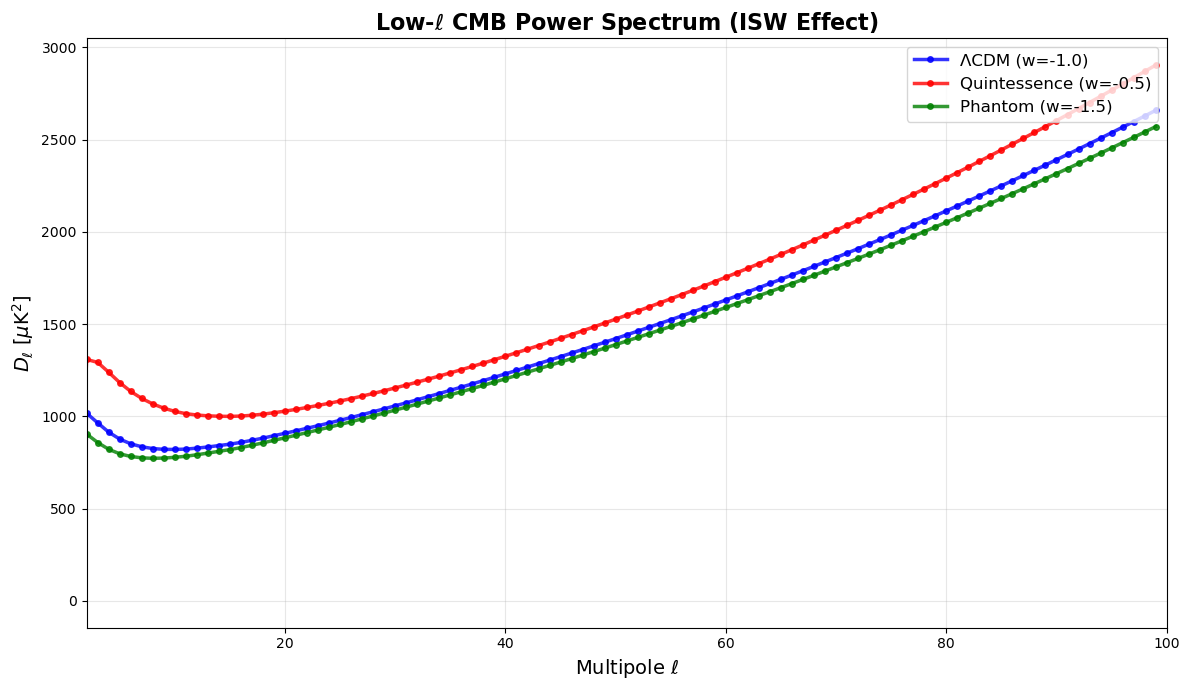

In [14]:
# Focus on low multipole region (ISW effect dominant region)
plt.figure(figsize=(12, 7))

for w, color, label in zip(w_values, colors, labels):
    ells = results[w]['ells']
    cls = results[w]['cls']
    # Plot only ℓ < 100
    mask = ells < 100
    plt.plot(ells[mask], cls[mask], color=color, linewidth=2.5, 
             marker='o', markersize=4, label=label, alpha=0.8)

plt.xlabel('Multipole $\ell$', fontsize=14)
plt.ylabel('$D_\ell$ [$\mu$K$^2$]', fontsize=14)
plt.title('Low-$\ell$ CMB Power Spectrum (ISW Effect)', fontsize=16, fontweight='bold')
plt.xlim(2, 100)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.savefig('cmb_low_ell_ISW.pdf', dpi=300, bbox_inches='tight')
plt.savefig('cmb_low_ell_ISW.png', dpi=300, bbox_inches='tight')
plt.show()


## Peak Positions


In [15]:
from scipy.signal import find_peaks

# Find acoustic peak positions
print("Acoustic peak position analysis:")
print("="*70)

peak_data = {}
for w, label in zip(w_values, labels):
    ells = results[w]['ells']
    cls = results[w]['cls']
    
    # Find peaks in the range 50 < l < 1500
    mask = (ells > 50) & (ells < 1500)
    ells_range = ells[mask]
    cls_range = cls[mask]
    
    # Find peaks
    peaks_idx, properties = find_peaks(cls_range, prominence=200, distance=50)
    peak_ells = ells_range[peaks_idx]
    peak_values = cls_range[peaks_idx]
    
    peak_data[w] = {'ells': peak_ells, 'values': peak_values}
    
    print(f"\n{label}:")
    for i, (ell, val) in enumerate(zip(peak_ells[:5], peak_values[:5]), 1):
        print(f"  Peak {i}: l = {ell:4d}, D_l = {val:7.1f} μK²")

# Calculate peak position shifts
print("\n\nPeak position shifts relative to ΛCDM:")
print("="*70)
peak_lcdm = peak_data[-1.0]['ells']
for w, label in zip([-0.5, -1.5], [labels[1], labels[2]]):
    peak_w = peak_data[w]['ells']
    print(f"\n{label}:")
    for i in range(min(5, len(peak_lcdm), len(peak_w))):
        shift = peak_w[i] - peak_lcdm[i]
        print(f"  Peak {i+1}: Δl = {shift:+4d} (l from {peak_lcdm[i]} → {peak_w[i]})")


Acoustic peak position analysis:

ΛCDM (w=-1.0):
  Peak 1: l =  220, D_l =  5699.2 μK²
  Peak 2: l =  536, D_l =  2595.5 μK²
  Peak 3: l =  812, D_l =  2537.2 μK²

Quintessence (w=-0.5):
  Peak 1: l =  205, D_l =  5700.0 μK²
  Peak 2: l =  499, D_l =  2598.9 μK²
  Peak 3: l =  755, D_l =  2550.9 μK²
  Peak 4: l = 1048, D_l =  1245.9 μK²

Phantom (w=-1.5):
  Peak 1: l =  227, D_l =  5700.3 μK²
  Peak 2: l =  551, D_l =  2594.0 μK²
  Peak 3: l =  836, D_l =  2532.4 μK²


Peak position shifts relative to ΛCDM:

Quintessence (w=-0.5):
  Peak 1: Δl =  -15 (l from 220 → 205)
  Peak 2: Δl =  -37 (l from 536 → 499)
  Peak 3: Δl =  -57 (l from 812 → 755)

Phantom (w=-1.5):
  Peak 1: Δl =   +7 (l from 220 → 227)
  Peak 2: Δl =  +15 (l from 536 → 551)
  Peak 3: Δl =  +24 (l from 812 → 836)


## Angular Diameter Distance


In [12]:
def compute_angular_diameter_distance(w, h=0.669, ombh2=0.0221, omch2=0.1209):
    """Calculate angular diameter distance to the last scattering surface"""
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=h*100, ombh2=ombh2, omch2=omch2)
    pars.set_dark_energy(w=w, dark_energy_model='fluid')
    
    results = camb.get_results(pars)
    
    # Get redshift of last scattering surface
    z_star = results.get_derived_params()['zstar']
    
    # Calculate angular diameter distance
    DA_star = results.angular_diameter_distance(z_star)
    
    return z_star, DA_star

print("Physical quantities at the last scattering surface:")
print("="*70)

for w, label in zip(w_values, labels):
    z_star, DA_star = compute_angular_diameter_distance(w, h=h, ombh2=ombh2, omch2=omch2)
    print(f"\n{label}:")
    print(f"  Last scattering redshift z* = {z_star:.2f}")
    print(f"  Angular diameter distance DA(z*) = {DA_star:.2f} Mpc")
    
# Calculate changes relative to ΛCDM
z_lcdm, DA_lcdm = compute_angular_diameter_distance(-1.0, h=h, ombh2=ombh2, omch2=omch2)

print("\n\nChanges relative to ΛCDM:")
print("="*70)
for w, label in zip([-0.5, -1.5], [labels[1], labels[2]]):
    z_star, DA_star = compute_angular_diameter_distance(w, h=h, ombh2=ombh2, omch2=omch2)
    delta_z = z_star - z_lcdm
    delta_DA = DA_star - DA_lcdm
    print(f"\n{label}:")
    print(f"  Δz* = {delta_z:+.2f}")
    print(f"  ΔDA = {delta_DA:+.2f} Mpc ({delta_DA/DA_lcdm*100:+.2f}%)")


Physical quantities at the last scattering surface:

ΛCDM (w=-1.0):
  Last scattering redshift z* = 1090.36
  Angular diameter distance DA(z*) = 12.71 Mpc

Quintessence (w=-0.5):
  Last scattering redshift z* = 1090.36
  Angular diameter distance DA(z*) = 11.81 Mpc

Phantom (w=-1.5):
  Last scattering redshift z* = 1090.36
  Angular diameter distance DA(z*) = 13.08 Mpc


Changes relative to ΛCDM:

Quintessence (w=-0.5):
  Δz* = +0.00
  ΔDA = -0.90 Mpc (-7.06%)

Phantom (w=-1.5):
  Δz* = -0.00
  ΔDA = +0.38 Mpc (+2.96%)
